In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy import stats
import os
os.environ['OMP_NUM_THREADS'] = '1'
import matplotlib
matplotlib.style.use('ggplot')

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn import cluster
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

# Data manipulated in Excel into the files imported here

In [2]:
crime_df = pd.read_csv('state_crimes.csv')
crime_per_pop = pd.read_csv('state_crimes_per_pop.csv')

In [29]:
feature_df = pd.read_csv('state_factors.csv')
feature_per_pop = pd.read_csv('state_factors_per_pop.csv')

In [4]:
all_df= pd.read_csv('state_crimes_and_factors_all.csv')

In [5]:
crime_df.set_index("State",inplace=True)
crime_df.head()

,Total Offenses,Total Offenses Against People,Assault Offenses,Homicide Offenses,Human Trafficking Offenses,Kidnapping/Abduction,Sex Offenses,Total Offenses Against Property,Arson,Bribery,...,Motor Vehicle Theft,Robbery,Stolen Property Offenses,Total Offenses against Society,Animal Cruelty,Drug/Narcotic Offenses,Gambling Offenses,Pornography/Obscene Material,Prostitution Offenses,Weapon Law Violations
State,,,,,,,,,,,,,,,,,,,,,
Alabama,257148,76654,73898,482,36,338,1900,130599,666,13,...,8757,1513,2208,49895,607,43361,25,668,77,5157
Alaska,16944,6681,5826,45,9,41,760,8399,64,0,...,637,99,32,1864,27,1325,1,39,15,457
Arizona,231651,58118,53000,293,82,794,3949,127557,480,9,...,7667,1387,1440,45976,510,39724,1,1039,369,4333
Arkansas,218559,64358,60242,337,10,652,3117,119718,490,3,...,7436,1208,2481,34483,81,30507,13,534,68,3280
California,871864,184079,165486,762,127,4847,12857,543624,3360,14,...,65460,14283,15875,144161,645,117419,59,1654,871,23513


In [30]:
feature_df.set_index("State",inplace=True)
feature_df.head()

,Population,$Police protection/1000,$Parks and Recreation/1000,$Parks and RecreationCO/1000,$Housing and community/1000,$Public welfare/1000,$Cash assistance/1000,$Vendor Payments/1000,$other Public welfare/1000,$Education/1000,...,$Higher Education/1000,$Higher EducationCO /1000,$Lower Education/1000,$Lower EducationCO/1000,$ Other Education/1000,$ Libraries/1000,Median household Income,Median monthly housing cost,"GDP/1,000,000",Estimated Unauthorized Immigrants
State,,,,,,,,,,,,,,,,,,,,,
Alabama,4519862,1450860,497057,77697,612762,8021380,138019,7049243,834118,16520150,...,6027554,903151,8879307,653200,1613289,134891,59674,861,1126276.0,62000
Alaska,444412,405508,127231,16873,311649,2653886,119923,2201807,332156,3251185,...,634570,40930,2531505,200778,85110,39074,88121,1398,262795.3,10000
Arizona,4571670,2895752,787023,169482,674739,20930578,359246,16330937,4240395,20429954,...,6975508,669590,10033486,1411236,3420960,196534,74568,1280,1902614.8,273000
Arkansas,2986257,730710,273815,75083,254668,7924204,10685,7166348,747171,9274145,...,2915262,344909,5698218,664851,660665,99476,55432,813,663957.1,58000
California,20450698,24897685,7109236,1576701,10545080,151467254,8129983,119916138,23421133,159872919,...,52152767,5990797,98917011,10143370,8803141,1715881,91551,1925,14566573.7,2739000


In [7]:
crime_per_pop.set_index("State",inplace=True)
crime_per_pop.head()

,Total Offense Rate per 1000,Total Offenses Against People,Assault Offenses,Homicide Offenses,Human Trafficking Offenses,Kidnapping/Abduction,Sex Offenses,Total Offenses Against Property,Arson,Bribery,...,Motor Vehicle Theft,Robbery,Stolen Property Offenses,Total Offenses against Society,Animal Cruelty,Drug/ Narcotic Offenses,Gambling Offenses,Pornography/ Obscene Material,Prostitution Offenses,Weapon Law Violations
State,,,,,,,,,,,,,,,,,,,,,
Alabama,56.893,16.959,16.350,0.107,0.008,0.075,0.420,28.894,0.147,0.003,...,1.937,0.335,0.489,11.039,0.134,9.593,0.006,0.148,0.017,1.141
Alaska,38.127,15.033,13.109,0.101,0.020,0.092,1.710,18.899,0.144,0.000,...,1.433,0.223,0.072,4.194,0.061,2.981,0.002,0.088,0.034,1.028
Arizona,50.671,12.713,11.593,0.064,0.018,0.174,0.864,27.902,0.105,0.002,...,1.677,0.303,0.315,10.057,0.112,8.689,0.000,0.227,0.081,0.948
Arkansas,73.188,21.551,20.173,0.113,0.003,0.218,1.044,40.090,0.164,0.001,...,2.490,0.405,0.831,11.547,0.027,10.216,0.004,0.179,0.023,1.098
California,42.632,9.001,8.092,0.037,0.006,0.237,0.629,26.582,0.164,0.001,...,3.201,0.698,0.776,7.049,0.032,5.742,0.003,0.081,0.043,1.150


In [375]:
crime_per_pop.mean()

Total Offense Rate per 1000        51.872294
Total Offenses Against People      13.657059
Assault Offenses                   12.531176
Homicide Offenses                   0.073353
Human Trafficking Offenses          0.009804
Kidnapping/Abduction                0.169255
Sex Offenses                        0.873529
Total Offenses Against Property    30.499275
Arson                               0.117608
Bribery                             0.003196
Burglary/ Breaking & Entering       2.500451
Counterfeiting/ Forgery             0.574392
Destruction/ Damage/ Vandalism      6.184157
Embezzlement                        0.134784
Extortion/ Blackmail                0.088980
Fraud Offenses                      3.276098
Larceny/ Theft Offenses            14.054078
Motor Vehicle Theft                 2.572961
Robbery                             0.536431
Stolen Property Offenses            0.456137
Total Offenses against Society      7.715902
Animal Cruelty                      0.102275
Drug/ Narc

In [376]:
crime_per_pop.median()

Total Offense Rate per 1000        48.797
Total Offenses Against People      12.969
Assault Offenses                   11.781
Homicide Offenses                   0.070
Human Trafficking Offenses          0.007
Kidnapping/Abduction                0.158
Sex Offenses                        0.843
Total Offenses Against Property    28.894
Arson                               0.109
Bribery                             0.002
Burglary/ Breaking & Entering       2.141
Counterfeiting/ Forgery             0.514
Destruction/ Damage/ Vandalism      5.548
Embezzlement                        0.094
Extortion/ Blackmail                0.082
Fraud Offenses                      3.279
Larceny/ Theft Offenses            13.535
Motor Vehicle Theft                 2.238
Robbery                             0.410
Stolen Property Offenses            0.412
Total Offenses against Society      7.184
Animal Cruelty                      0.073
Drug/ Narcotic Offenses             5.717
Gambling Offenses                 

In [377]:
crime_per_pop.std()

Total Offense Rate per 1000        15.001536
Total Offenses Against People       4.524254
Assault Offenses                    4.361105
Homicide Offenses                   0.044125
Human Trafficking Offenses          0.010000
Kidnapping/Abduction                0.111894
Sex Offenses                        0.316420
Total Offenses Against Property    10.040634
Arson                               0.057678
Bribery                             0.003382
Burglary/ Breaking & Entering       1.182025
Counterfeiting/ Forgery             0.209214
Destruction/ Damage/ Vandalism      2.998387
Embezzlement                        0.123680
Extortion/ Blackmail                0.047843
Fraud Offenses                      1.162004
Larceny/ Theft Offenses             4.122637
Motor Vehicle Theft                 1.576410
Robbery                             0.524329
Stolen Property Offenses            0.261349
Total Offenses against Society      3.917134
Animal Cruelty                      0.183347
Drug/ Narc

In [378]:
crime_per_pop.max()

Total Offense Rate per 1000        107.774
Total Offenses Against People       31.551
Assault Offenses                    30.120
Homicide Offenses                    0.293
Human Trafficking Offenses           0.063
Kidnapping/Abduction                 0.536
Sex Offenses                         1.710
Total Offenses Against Property     67.782
Arson                                0.301
Bribery                              0.018
Burglary/ Breaking & Entering        6.154
Counterfeiting/ Forgery              1.440
Destruction/ Damage/ Vandalism      20.220
Embezzlement                         0.480
Extortion/ Blackmail                 0.190
Fraud Offenses                       7.134
Larceny/ Theft Offenses             28.285
Motor Vehicle Theft                  7.827
Robbery                              3.578
Stolen Property Offenses             1.113
Total Offenses against Society      16.972
Animal Cruelty                       1.345
Drug/ Narcotic Offenses             15.463
Gambling Of

In [379]:
crime_per_pop.min()

Total Offense Rate per 1000        31.759
Total Offenses Against People       6.528
Assault Offenses                    5.859
Homicide Offenses                   0.016
Human Trafficking Offenses          0.000
Kidnapping/Abduction                0.020
Sex Offenses                        0.362
Total Offenses Against Property    16.684
Arson                               0.009
Bribery                             0.000
Burglary/ Breaking & Entering       0.696
Counterfeiting/ Forgery             0.319
Destruction/ Damage/ Vandalism      1.264
Embezzlement                        0.006
Extortion/ Blackmail                0.007
Fraud Offenses                      1.383
Larceny/ Theft Offenses             6.931
Motor Vehicle Theft                 0.654
Robbery                             0.070
Stolen Property Offenses            0.037
Total Offenses against Society      1.980
Animal Cruelty                      0.000
Drug/ Narcotic Offenses             1.114
Gambling Offenses                 

In [31]:
feature_per_pop.set_index("State",inplace=True)
feature_per_pop.head()

,Population,$Police protection/1000,$Parks and Recreation/1000,$Parks and RecreationCO/1000,$Housing and community/1000,$Public welfare/1000,$Cash assistance/1000,$Vendor Payments/1000,$other Public welfare/1000,$Education/1000,...,$Higher Education/1000,$Higher EducationCO /1000,$Lower Education/1000,$Lower EducationCO/1000,$ Other Education/1000,$ Libraries/1000,Median household Income,Median monthly housing cost,"GDP/1,000,000",Estimated Unauthorized Immigrants
State,,,,,,,,,,,,,,,,,,,,,
Alabama,4519862,320.996526,109.971720,17.190127,135.570953,1774.695776,30.536109,1559.614652,184.545015,3655.012034,...,1333.570361,199.818269,1964.508430,144.517687,356.933243,29.844053,59674,861,249.183714,13.717233
Alaska,444412,912.459610,286.290649,37.967022,701.261442,5971.679433,269.846449,4954.427423,747.405561,7315.700296,...,1427.886736,92.099223,5696.302080,451.783480,191.511480,87.922918,88121,1398,591.332592,22.501643
Arizona,4571670,633.412298,172.152189,37.072230,147.591362,4578.322145,78.580912,3572.203812,927.537421,4468.816428,...,1525.811793,146.465077,2194.709154,308.691572,748.295481,42.989542,74568,1280,416.175008,59.715596
Arkansas,2986257,244.690929,91.691706,25.142846,85.280001,2653.557279,3.578058,2399.776041,250.203181,3105.608459,...,976.226092,115.498767,1908.147222,222.636900,221.235145,33.311266,55432,813,222.337562,19.422307
California,20450698,1217.449155,347.628037,77.097662,515.634234,7406.458890,397.540612,5863.669690,1145.248588,7817.479824,...,2550.170513,292.938510,4836.852561,495.991384,430.456750,83.903298,91551,1925,712.277581,133.931859


In [32]:
crime_df.dtypes,crime_per_pop.dtypes,feature_df.dtypes,feature_per_pop.dtypes

(Total Offenses                     int64
 Total Offenses Against People      int64
 Assault Offenses                   int64
 Homicide Offenses                  int64
 Human Trafficking Offenses         int64
 Kidnapping/Abduction               int64
 Sex Offenses                       int64
 Total Offenses Against Property    int64
 Arson                              int64
 Bribery                            int64
 Burglary/Breaking & Entering       int64
 Counterfeiting/Forgery             int64
 Destruction/Damage/Vandalism       int64
 Embezzlement                       int64
 Extortion/Blackmail                int64
 Fraud Offenses                     int64
 Larceny/Theft Offenses             int64
 Motor Vehicle Theft                int64
 Robbery                            int64
 Stolen Property Offenses           int64
 Total Offenses against Society     int64
 Animal Cruelty                     int64
 Drug/Narcotic Offenses             int64
 Gambling Offenses                

In [10]:
all_df.head()

,State,Population\nCovered,Total Offenses,Total \nOffenses Against People,Assault\nOffenses,Homicide\nOffenses,Human\nTrafficking\nOffenses,Kidnapping/\nAbduction,Sex \nOffenses,Total \nOffenses Against Property,...,$Higher Education/1000,$Higher EducationCO /1000,$Lower Education/1000,$Lower EducationCO/1000,$ Other Education/1000,$ Libraries/1000,Median household Income,Median monthly housing cost,"GDP/1,000,000",Estimated Unauthorized Immigrants
0,Alabama,4519862,257148,76654,73898,482,36,338,1900,130599,...,6027554,903151,8879307,653200,1613289,134891,59674,861,1126276.0,62000
1,Alaska,444412,16944,6681,5826,45,9,41,760,8399,...,634570,40930,2531505,200778,85110,39074,88121,1398,262795.3,10000
2,Arizona,4571670,231651,58118,53000,293,82,794,3949,127557,...,6975508,669590,10033486,1411236,3420960,196534,74568,1280,1902614.8,273000
3,Arkansas,2986257,218559,64358,60242,337,10,652,3117,119718,...,2915262,344909,5698218,664851,660665,99476,55432,813,663957.1,58000
4,California,20450698,871864,184079,165486,762,127,4847,12857,543624,...,52152767,5990797,98917011,10143370,8803141,1715881,91551,1925,14566573.7,2739000


In [11]:
all_df.dtypes

State                                        object
Population\nCovered                           int64
Total Offenses                                int64
Total \nOffenses Against People               int64
Assault\nOffenses                             int64
Homicide\nOffenses                            int64
Human\nTrafficking\nOffenses                  int64
Kidnapping/\nAbduction                        int64
Sex \nOffenses                                int64
Total \nOffenses    Against     Property      int64
Arson                                         int64
Bribery                                       int64
Burglary/\nBreaking &\nEntering               int64
Counterfeiting/\nForgery                      int64
Destruction/\nDamage/\nVandalism              int64
Embezzlement                                  int64
Extortion/\nBlackmail                         int64
Fraud \nOffenses                              int64
Larceny/\nTheft\nOffenses                     int64
Motor\nVehic

# Feature Selection : Correlations

In [13]:
def find_feature_correlations_to_target(target,df):
    
    # initialize variable lists
    var = []
    pearsons = []
    pvalues = []
    
    for feat in df.columns.tolist():
        
        var.append(feat)
        
        p, p_value = stats.pearsonr(df[feat], target) # get pearson correlation
        pearsons.append(p)
        pvalues.append(p_value)
        
    # Build dataframe of feature1 vs. feature2 pearson correlation
    target_corr_df = pd.DataFrame({'Feature': var,
                            'P': pearsons,
                            'p-value': pvalues})
    
    return target_corr_df

In [313]:
def view_corr(df):
    df_corr = pd.DataFrame({'variable': df['Feature'],
                            'correlation': df['P'],
                            'abs_corr': np.abs(df['P']),
                            'p-value': df['p-value']})
    plt.subplot(121)
    df_corr.sort_values('abs_corr', inplace=True, ascending=False)
    sns.barplot(x='correlation',y="variable",data=df_corr)
    
    plt.subplot(122)
    sns.barplot(x='p-value',y="variable",data=df_corr,)
    plt.gca().set_yticklabels([])

## All crime per population correlation

In [33]:
crimepp_corr= find_feature_correlations_to_target(crime_per_pop['Total Offense Rate per 1000'], feature_per_pop)

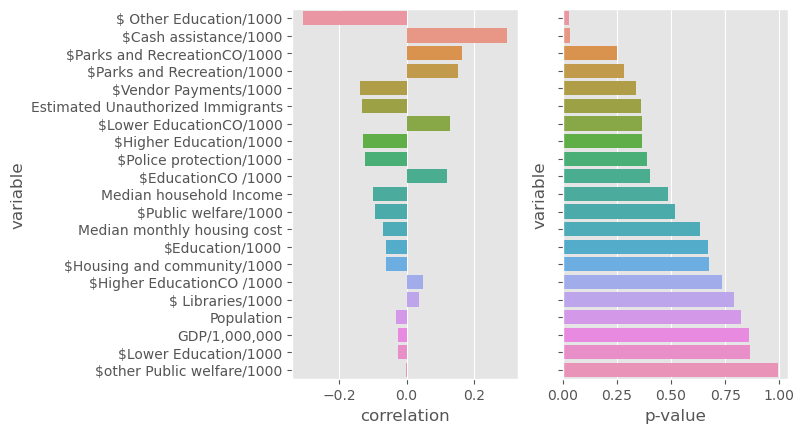

In [314]:
view_corr(crimepp_corr)

In [34]:
crimepp_corr.sort_values(by='P',ascending=True)

,Feature,P,p-value
15,$ Other Education/1000,-0.307536,0.028142
7,$Vendor Payments/1000,-0.136895,0.338109
20,Estimated Unauthorized Immigrants,-0.131039,0.359370
11,$Higher Education/1000,-0.129717,0.364278
1,$Police protection/1000,-0.123335,0.388551
17,Median household Income,-0.099932,0.485356
5,$Public welfare/1000,-0.092280,0.519543
18,Median monthly housing cost,-0.068631,0.632270
9,$Education/1000,-0.061376,0.668761
4,$Housing and community/1000,-0.060091,0.675307


## Crimes against People per population correlation

In [35]:
crimePeop_pp_corr= find_feature_correlations_to_target(crime_per_pop['Total Offenses Against People'], feature_per_pop)

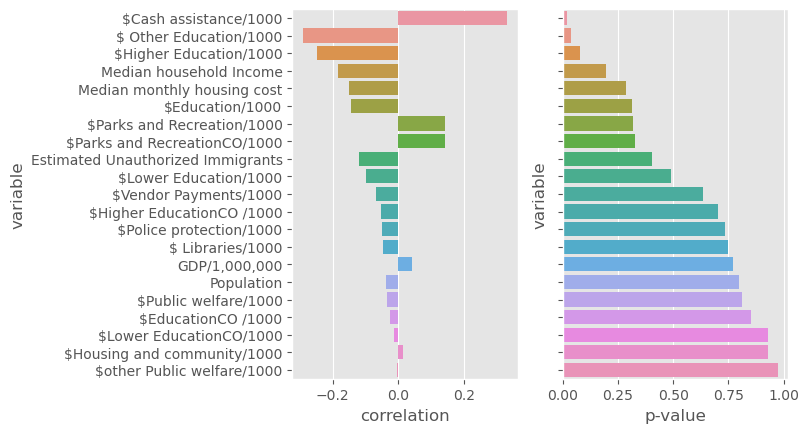

In [315]:
view_corr(crimePeop_pp_corr)

In [36]:
crimePeop_pp_corr.sort_values(by='P',ascending=True)

,Feature,P,p-value
15,$ Other Education/1000,-0.291637,0.037852
11,$Higher Education/1000,-0.247544,0.079883
17,Median household Income,-0.184340,0.195339
18,Median monthly housing cost,-0.151712,0.287895
9,$Education/1000,-0.144508,0.311667
20,Estimated Unauthorized Immigrants,-0.119640,0.403027
13,$Lower Education/1000,-0.098493,0.491692
7,$Vendor Payments/1000,-0.068568,0.632579
12,$Higher EducationCO /1000,-0.054572,0.703690
1,$Police protection/1000,-0.049085,0.732310


## Crimes against Property per population correlation

In [37]:
crimeProp_pp_corr= find_feature_correlations_to_target(crime_per_pop['Total Offenses Against Property'], feature_per_pop)

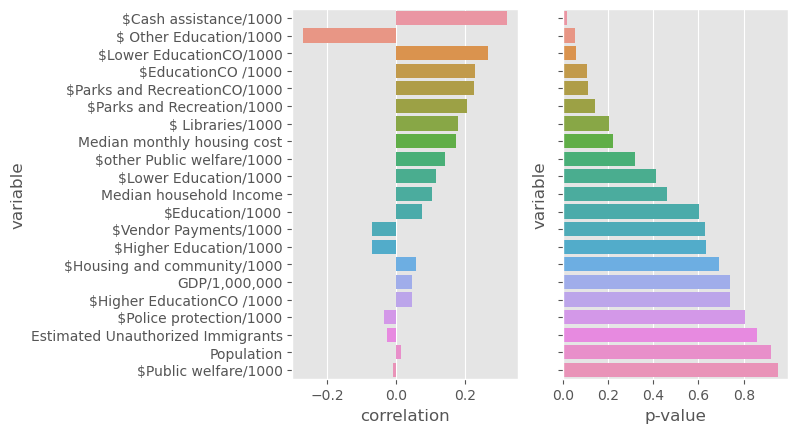

In [316]:
view_corr(crimeProp_pp_corr)

In [38]:
crimeProp_pp_corr.sort_values(by='P',ascending=True)

,Feature,P,p-value
15,$ Other Education/1000,-0.271063,0.054358
7,$Vendor Payments/1000,-0.069457,0.628164
11,$Higher Education/1000,-0.068150,0.634664
1,$Police protection/1000,-0.035440,0.804988
20,Estimated Unauthorized Immigrants,-0.025606,0.858442
5,$Public welfare/1000,-0.009072,0.949620
0,Population,0.014094,0.921804
12,$Higher EducationCO /1000,0.047393,0.741211
19,"GDP/1,000,000",0.047727,0.739455
4,$Housing and community/1000,0.057282,0.689700


## Crimes against Society per population correlation

In [42]:
crimeSoc_pp_corr= find_feature_correlations_to_target(crime_per_pop['Total Offenses against Society'], feature_per_pop)

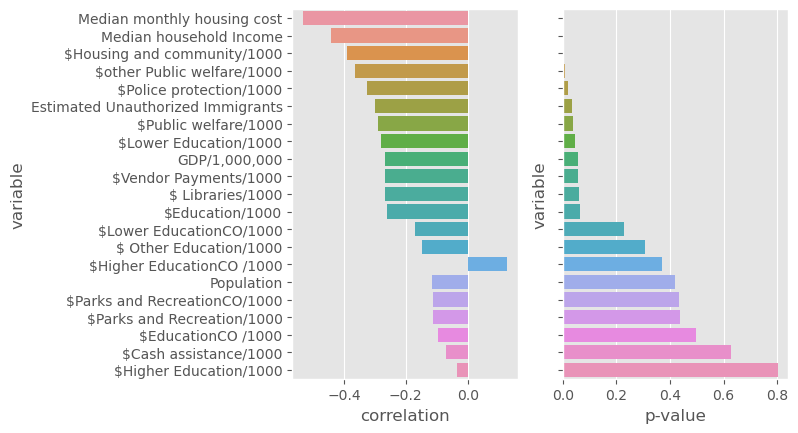

In [317]:
view_corr(crimeSoc_pp_corr)

In [43]:
crimeSoc_pp_corr.sort_values(by='P',ascending=True)

,Feature,P,p-value
18,Median monthly housing cost,-0.533816,0.000055
17,Median household Income,-0.440350,0.001222
4,$Housing and community/1000,-0.391441,0.004505
8,$other Public welfare/1000,-0.364046,0.008636
1,$Police protection/1000,-0.324840,0.020030
20,Estimated Unauthorized Immigrants,-0.298053,0.033645
5,$Public welfare/1000,-0.290574,0.038590
13,$Lower Education/1000,-0.280759,0.045972
19,"GDP/1,000,000",-0.267513,0.057721
7,$Vendor Payments/1000,-0.267073,0.058149


## All Crime total population

In [39]:
crimetot_corr= find_feature_correlations_to_target(crime_df['Total Offenses'], feature_df)

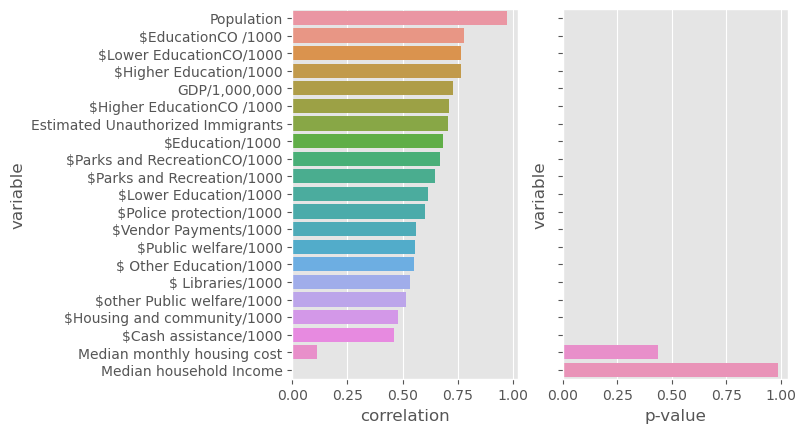

In [318]:
view_corr(crimetot_corr)

In [44]:
crimetot_corr.sort_values(by='P',ascending=False)

,Feature,P,p-value
0,Population,0.972435,1.209154e-32
10,$EducationCO /1000,0.778337,1.790275e-11
14,$Lower EducationCO/1000,0.765807,5.879889e-11
11,$Higher Education/1000,0.763719,7.117225e-11
19,"GDP/1,000,000",0.726999,1.532709e-09
12,$Higher EducationCO /1000,0.708727,5.914510e-09
20,Estimated Unauthorized Immigrants,0.705236,7.566665e-09
9,$Education/1000,0.680729,3.880305e-08
3,$Parks and RecreationCO/1000,0.669516,7.790814e-08
2,$Parks and Recreation/1000,0.647619,2.799015e-07


# Standardizing Scale

In [67]:
scaler=StandardScaler()

# Feature Selection: Forward Feature

In [319]:
def forward_feature_selection(X_train,y_train,show_steps=True):
    ## Use Forward Feature Selection to pick a good model

    # start with no predictors
    included = []
    # keep track of model and parameters
    best = {'feature': '', 'r2': 0, 'a_r2': 0}
    # create a model object to hold the modelling parameters
    model = LinearRegression()
    # get the number of cases in the training data
    n = X_train.shape[0]

    r2_list = []
    adjusted_r2_list = []

    while True:
        changed = False

        if show_steps:
            print('')

        # list the features to be evaluated
        excluded = list(set(X.columns) - set(included))

        if show_steps:
            print('(Step) Excluded = %s' % ', '.join(excluded))

        # for each remaining feature to be evaluated
        for new_column in excluded:

            if show_steps:
                print('(Step) Trying %s...' % new_column)
                print('(Step) - Features = %s' % ', '.join(included + [new_column]))

            # fit the model with the Training data
            fit =model.fit(X_train[included+ [new_column]],y_train) # fit a model; consider which predictors should be included
            # calculate the score (R^2 for Regression)
            r2 = model.score(X_train[included+ [new_column]],y_train) # calculate the score
            # number of predictors in this model
            k = len(included) + 1
            # calculate the adjusted R^2
            adjusted_r2 = 1-(((1-r2)*(n-1))/(n-k-1)) # calculate the Adjusted R^2

            if show_steps:
                print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' %
                  (adjusted_r2, best['a_r2']))

            # if model improves
            if adjusted_r2 > best['a_r2']:
                # record new parameters
                best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
                # flag that found a better model
                changed = True
                if show_steps:
                    print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' %
                          (best['feature'], best['r2'], best['a_r2']))
        # END for

        # if found a better model after testing all remaining features
        if changed:
            # update control details
            included.append(best['feature'])
            r2_list.append(best['r2'])
            adjusted_r2_list.append(best['a_r2'])
            excluded = list(set(excluded) - set(best['feature']))
            print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' %
                  (best['feature'], best['r2'], best['a_r2']))
        else:
            # terminate if no better model
            return included, r2_list, adjusted_r2_list   

In [370]:
def view_r2(r2_list,adjusted_r2_list):
    ## Chart both R^2 and Adjusted R^2

    _range = range(1, len(r2_list)+1)

    # define chart size
    plt.figure(figsize = (10, 5))
    # plot each metric
    plt.plot(_range, r2_list, label = '$R^2$')
    plt.plot(_range, adjusted_r2_list, label = '$Adjusted \: R^2$')
    # add some better visualization
    plt.xlabel('Number of Features')
    plt.legend()
    # output the chart
    plt.show()

## All per population

In [94]:
X=feature_per_pop
y= crime_per_pop['Total Offense Rate per 1000']

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [320]:
feat_all_per_pop, fapp_r2, fapp_adj_r2 =forward_feature_selection(X_train,y_train,show_steps=False)

Added feature $Cash assistance/1000 with R^2 = 0.204 and adjusted R^2 = 0.183
Added feature $Housing and community/1000 with R^2 = 0.296 and adjusted R^2 = 0.258
Added feature $Parks and RecreationCO/1000 with R^2 = 0.404 and adjusted R^2 = 0.354
Added feature  $Police protection/1000 with R^2 = 0.515 and adjusted R^2 = 0.460
Added feature Median household Income with R^2 = 0.549 and adjusted R^2 = 0.483
Added feature $Parks and Recreation/1000 with R^2 = 0.573 and adjusted R^2 = 0.496
Added feature $Higher EducationCO /1000 with R^2 = 0.610 and adjusted R^2 = 0.524
Added feature $Higher Education/1000 with R^2 = 0.624 and adjusted R^2 = 0.527
Added feature $Lower EducationCO/1000 with R^2 = 0.640 and adjusted R^2 = 0.532
Added feature $EducationCO /1000 with R^2 = 0.664 and adjusted R^2 = 0.549


In [97]:
feat_all_per_pop

['$Cash assistance/1000',
 '$Housing and community/1000',
 '$Parks and RecreationCO/1000',
 ' $Police protection/1000',
 'Median household Income',
 '$Parks and Recreation/1000',
 '$Higher EducationCO /1000',
 '$Higher Education/1000',
 '$Lower EducationCO/1000',
 '$EducationCO /1000']

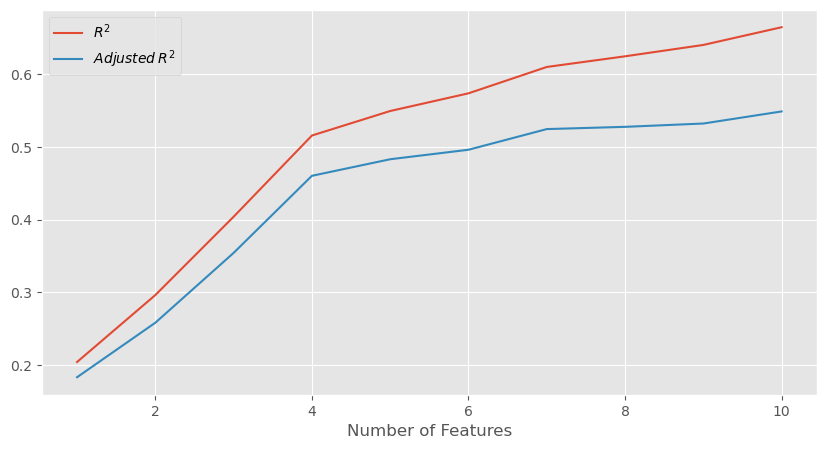

In [371]:
view_r2(fapp_r2,fapp_adj_r2)

## Against People per population

In [98]:
X=feature_per_pop
y= crime_per_pop['Total Offenses Against People']

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [100]:
feat_People_per_pop =forward_feature_selection(X_train,y_train,show_steps=False)

Added feature $Cash assistance/1000 with R^2 = 0.237 and adjusted R^2 = 0.217
Added feature Median household Income with R^2 = 0.377 and adjusted R^2 = 0.344
Added feature $Higher Education/1000 with R^2 = 0.426 and adjusted R^2 = 0.378
Added feature $Higher EducationCO /1000 with R^2 = 0.534 and adjusted R^2 = 0.480
Added feature $Parks and RecreationCO/1000 with R^2 = 0.629 and adjusted R^2 = 0.574
Added feature $other Public welfare/1000 with R^2 = 0.656 and adjusted R^2 = 0.594
Added feature $ Other Education/1000 with R^2 = 0.670 and adjusted R^2 = 0.598


In [101]:
feat_People_per_pop

['$Cash assistance/1000',
 'Median household Income',
 '$Higher Education/1000',
 '$Higher EducationCO /1000',
 '$Parks and RecreationCO/1000',
 '$other Public welfare/1000',
 '$ Other Education/1000']

## Against Property per population

In [102]:
X=feature_per_pop
y= crime_per_pop['Total Offenses Against Property']

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [104]:
feat_Property_per_pop =forward_feature_selection(X_train,y_train,show_steps=False)

Added feature $Cash assistance/1000 with R^2 = 0.196 and adjusted R^2 = 0.175
Added feature $Lower EducationCO/1000 with R^2 = 0.301 and adjusted R^2 = 0.263
Added feature $Education/1000 with R^2 = 0.394 and adjusted R^2 = 0.344
Added feature $ Libraries/1000 with R^2 = 0.430 and adjusted R^2 = 0.365
Added feature $Higher EducationCO /1000 with R^2 = 0.495 and adjusted R^2 = 0.421
Added feature $Higher Education/1000 with R^2 = 0.532 and adjusted R^2 = 0.446
Added feature $Parks and RecreationCO/1000 with R^2 = 0.562 and adjusted R^2 = 0.466
Added feature $Parks and Recreation/1000 with R^2 = 0.596 and adjusted R^2 = 0.492
Added feature GDP/1,000,000 with R^2 = 0.619 and adjusted R^2 = 0.505
Added feature $EducationCO /1000 with R^2 = 0.640 and adjusted R^2 = 0.516
Added feature $other Public welfare/1000 with R^2 = 0.655 and adjusted R^2 = 0.519


In [105]:
feat_Property_per_pop

['$Cash assistance/1000',
 '$Lower EducationCO/1000',
 '$Education/1000',
 '$ Libraries/1000',
 '$Higher EducationCO /1000',
 '$Higher Education/1000',
 '$Parks and RecreationCO/1000',
 '$Parks and Recreation/1000',
 'GDP/1,000,000',
 '$EducationCO /1000',
 '$other Public welfare/1000']

## Against Society per population

In [106]:
X=feature_per_pop
y= crime_per_pop['Total Offenses against Society']

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [108]:
feat_Society_per_pop =forward_feature_selection(X_train,y_train,show_steps=False)

Added feature Median monthly housing cost with R^2 = 0.228 and adjusted R^2 = 0.207
Added feature $Cash assistance/1000 with R^2 = 0.332 and adjusted R^2 = 0.296
Added feature $Housing and community/1000 with R^2 = 0.460 and adjusted R^2 = 0.415
Added feature $Higher Education/1000 with R^2 = 0.522 and adjusted R^2 = 0.467
Added feature $Parks and RecreationCO/1000 with R^2 = 0.547 and adjusted R^2 = 0.480
Added feature $other Public welfare/1000 with R^2 = 0.570 and adjusted R^2 = 0.492
Added feature $Parks and Recreation/1000 with R^2 = 0.585 and adjusted R^2 = 0.494
Added feature Population with R^2 = 0.601 and adjusted R^2 = 0.498
Added feature GDP/1,000,000 with R^2 = 0.616 and adjusted R^2 = 0.501


In [109]:
feat_Society_per_pop

['Median monthly housing cost',
 '$Cash assistance/1000',
 '$Housing and community/1000',
 '$Higher Education/1000',
 '$Parks and RecreationCO/1000',
 '$other Public welfare/1000',
 '$Parks and Recreation/1000',
 'Population',
 'GDP/1,000,000']

### All features for each section will be used due to low accuracy. Further data required

# Functions for Visualization

In [117]:
def view_coeff(X, model):
    model_coefs = pd.DataFrame({'variable': X.columns,
                                'coef': model.coef_,
                                'abs_coef': np.abs(model.coef_)})
    model_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    sns.barplot(x="coef", y="variable", data=model_coefs)

# Linear Regression Model

In [321]:
linR_all= LinearRegression()

In [322]:
y= crime_per_pop['Total Offense Rate per 1000']
X= feature_per_pop[feat_all_per_pop]

In [323]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [324]:
linR_all.fit(X_train,y_train)

LinearRegression()

In [325]:
linR_all.score(X_test,y_test)

0.0280980844532015

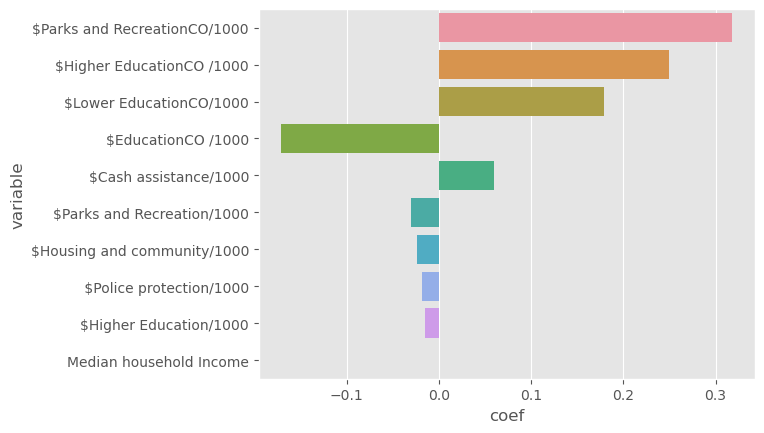

In [326]:
view_coeff(X,linR_all)

In [214]:
ypred=linR_all.predict(X_test)

In [215]:
mean_squared_error(y_test,ypred)

873.8361179739745

# Ridge Regression Model

In [348]:
ridge_all= Ridge()

In [352]:
y= crime_per_pop['Total Offense Rate per 1000']
X= feature_per_pop[feat_all_per_pop]

In [353]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [354]:

    # keep track of the intermediate results for coefficients and errors
    coefs = []
    errors = []

    # create a range of alphas to calculate
    ridge_alphas = np.logspace(-6, 6, 200) #lambda in the slides

    # Train the model with different regularization strengths
    for a in ridge_alphas:
        ridge_all.set_params(alpha = a)
        ridge_all.fit(X, y)
        coefs.append(ridge_all.coef_)
        errors.append(mean_squared_error(ridge_all.coef_, linR_all.coef_))

In [355]:
len(coefs)

200

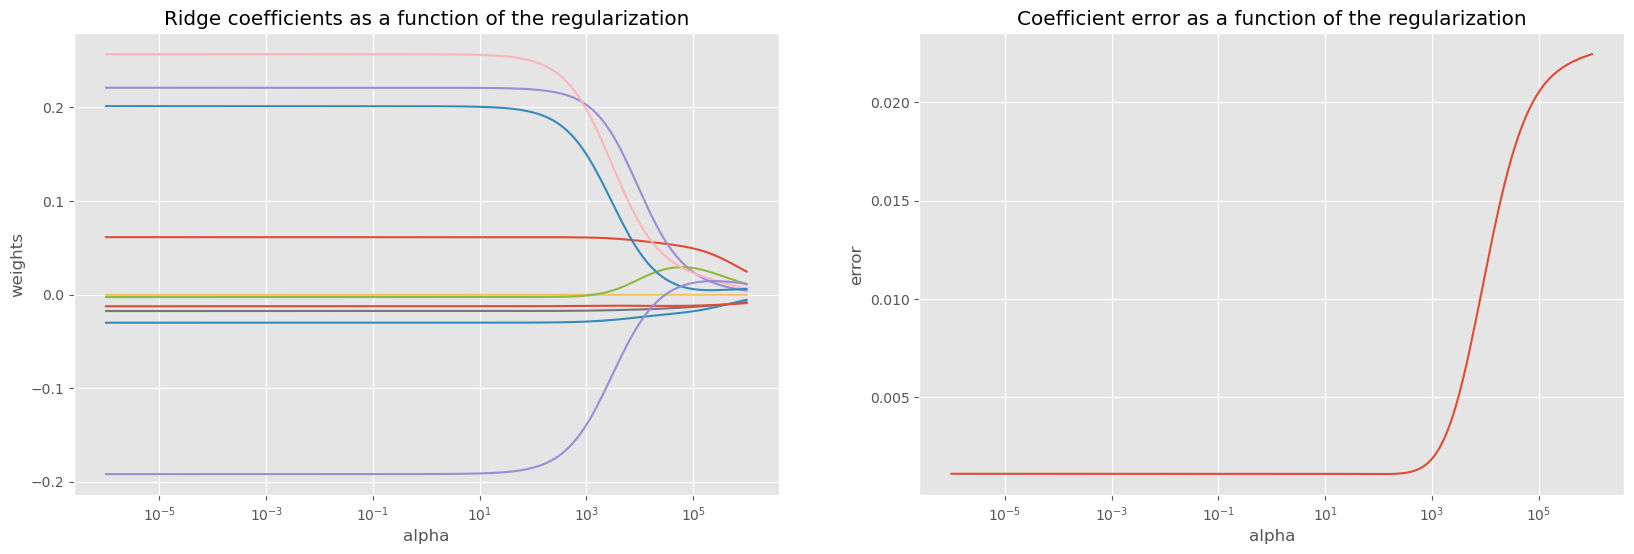

In [356]:
# Display results
plt.figure(figsize = (20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(ridge_alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(ridge_alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularization')
plt.axis('tight')

plt.show()

In [357]:
ypred=ridge_all.predict(X_test)

In [358]:
mean_squared_error(y_test,ypred)

175.04687402059466

In [359]:
ridge_all.score(X_test,y_test)

0.2360910581167791

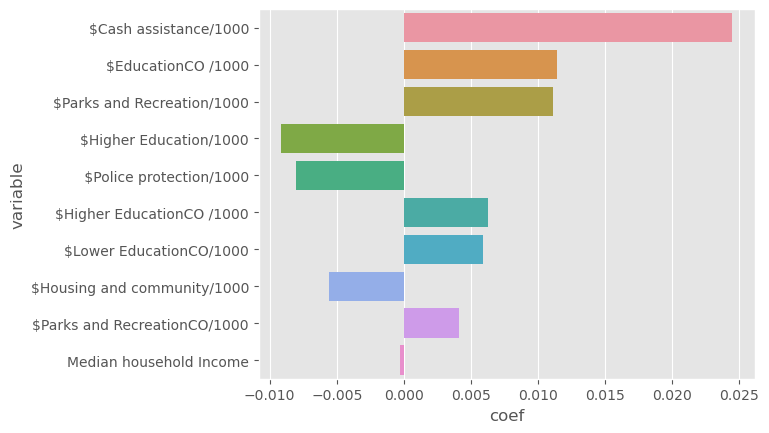

In [360]:
view_coeff(X,ridge_all)

# Lasso Regression Model

In [361]:
y= crime_per_pop['Total Offense Rate per 1000']
X= feature_per_pop[feat_all_per_pop]

In [362]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [363]:
## Calculate Lasso Regression model

# create a model object to hold the modelling parameters
lasso_all= Lasso()
# keep track of the intermediate results for coefficients and errors
lasso_coef=[]
lasso_err=[]
# create a range of alphas to calculate
lasso_alphas=np.logspace(-6,6,200)
# Train the model with different regularization strengths
for a in lasso_alphas:
    lasso_all.set_params(alpha = a)
    lasso_all.fit(X_train, y_train)
    lasso_coef.append(lasso_all.coef_)
    lasso_err.append(mean_squared_error(lasso_all.coef_, linR_all.coef_))

C:\Users\willv\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.466e+03, tolerance: 8.718e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\willv\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.466e+03, tolerance: 8.718e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\willv\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.466e+03, toleranc

C:\Users\willv\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.456e+03, tolerance: 8.718e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\willv\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.455e+03, tolerance: 8.718e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\willv\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.453e+03, toleranc

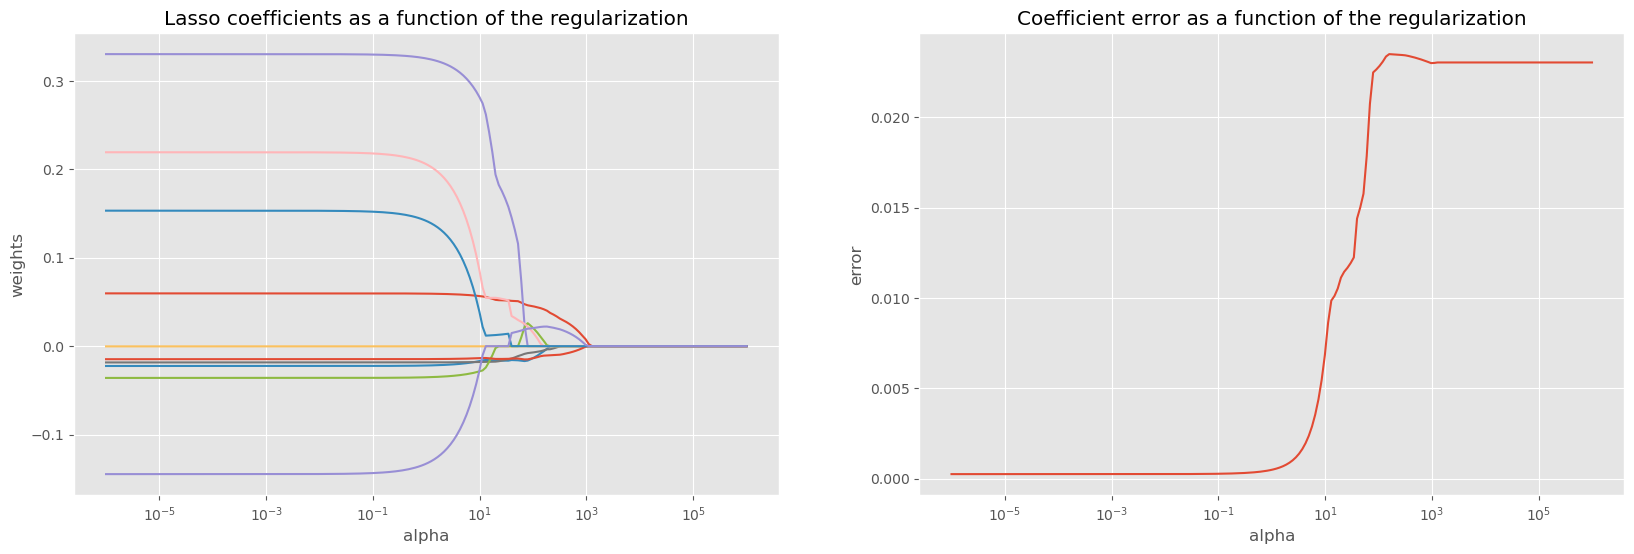

In [364]:
# Display results
plt.figure(figsize = (20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(lasso_alphas,lasso_coef)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(lasso_alphas,lasso_err)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularization')
plt.axis('tight')

plt.show()

In [365]:
lasso_all.score(X_test,y_test)

-0.006877656404472132

In [366]:
ypred=lasso_all.predict(X_test)

In [367]:
mean_squared_error(y_test,ypred)

230.72224529835228

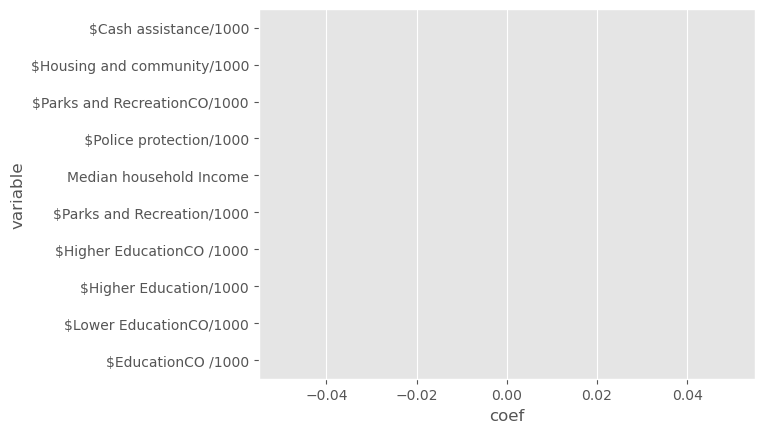

In [368]:
view_coeff(X,lasso_all)